# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**MICHAEL, OKEREAFOR**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import pairplot
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import math
from statsmodels.graphics.correlation import plot_corr


import warnings
warnings.filterwarnings('ignore') # just to turn off or ignore minor warnings that may pop-up while executing codes.

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

## Imported Packages and their uses
The imported Libraries were:

    - Numpy: For arrays, algebra and Mathematical Calculations.
    - Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
    - Matplotlib: For ploting normal charts and graphs.
    - Seaborn: For scatterplots.

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv("df_train.csv")
df.head(10)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


### Another way to view our data
As seen above, our `df_train` has 49 columns, and some of these columns are hidden. We need to view all these colums clearly to know what we are working on. So, let us use the transpose (T) method to bring the columns to the vertical side of our dataframe.

In [3]:
df = pd.read_csv("df_train.csv")
df.head(10).T  # We just add (.T)

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0


### Checking other details of our dataframe
Here, we want to know the size of our dataframe, columns and datatype, then check for null or missing values. 

In [4]:
print(df.info()) #checking the datatype of each column in the data
print('\n')
print(df.shape) # to know the size of our data (number of rows and columns) 
print('\n')
print(df.isnull().sum()) #checking for possible missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

From the output above, we observed that:
- There are 8763 rows and 49 columns.
- We have an `unnamed` column having the same values as index, this column is not useful at all.
- `Valencia_wind_deg` and `Seville_pressure` columns show 'object' datatype, we will convert them to contain numerical values, because regression works with only numeric datatypes.
- `Time` is also an 'object' datatype. it contains the "Year", "Month", "Day", "Hour", "Minute", and "Seconds" in which the load shortfall was recorded. In its case, we will break it down to different features.
- Valencia_pressure has 2068 null or missing values. We can later fill up these missing values with either mean or median of the column.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df.describe().T   # to produce a summary of statistics for our data

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


When looking at features like `Barcelona_pressure`, we suspect ouliers.
Let us use **kurtosis** to determine if there are outliers in our dataframe. Remember that **kurtosis** tells how heavy the tail of a feature distribution is; we can use this to identify outliers if the kurtosis value of any feature is greater than 3 (>3).

In [6]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

As shown by the **kurtosis** *report*, the following features can be said to have numerous outliers:
Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.


## Feature Interactions
Let us use the boxplot to check for outliers on one of the above mentioned features.

<AxesSubplot:xlabel='Valencia_wind_speed'>

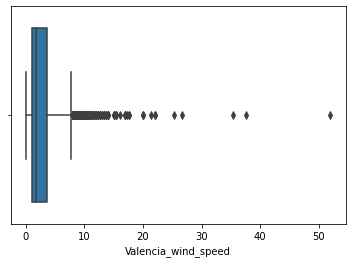

In [7]:
# plot relevant feature interactions
sns.boxplot(x='Valencia_wind_speed', data=df)  #Visualizing the Valencia_wind_speed data

<function matplotlib.pyplot.show(close=None, block=None)>

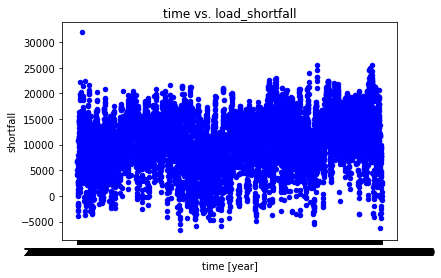

In [8]:
plt.scatter(x=df["time"], y=df["load_shortfall_3h"], s=20, c='blue')
plt.xlabel("time [year]")
plt.ylabel("shortfall")
plt.title("time vs. load_shortfall")
plt.show

As we can see from the boxplot above, there are several number of outliers in this feature.

## Checking for Multicollinearity
It is very important that our independent variables should not be correlated amongst themselves because it can lead to increase in standard error. 
We can visually discover linearity between our variables within our `df` is through the use of a correlation heatmap.

First, let us check for correlation values among our independent variables

In [9]:
# evaluate correlation
corr = df.corr()
corr

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


Alright, let's view it on the Heatmap

<AxesSubplot:>

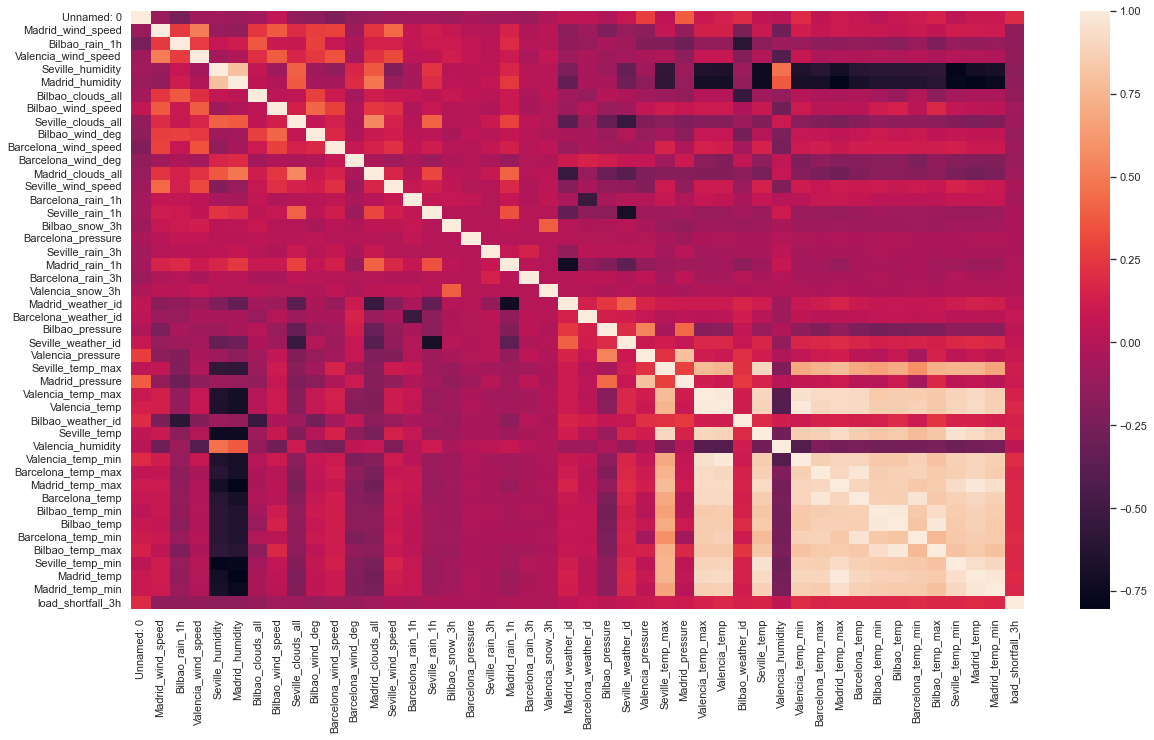

In [10]:
# Visualizing the correlation

sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)

We see on the heatmap above that there is presence of high correlation(almost white, and white) between features at the bottom right corner of our graph.
It is important to consider this step when choosing the best features which would result to an improvement of our model. We have to do something about those correlated features.

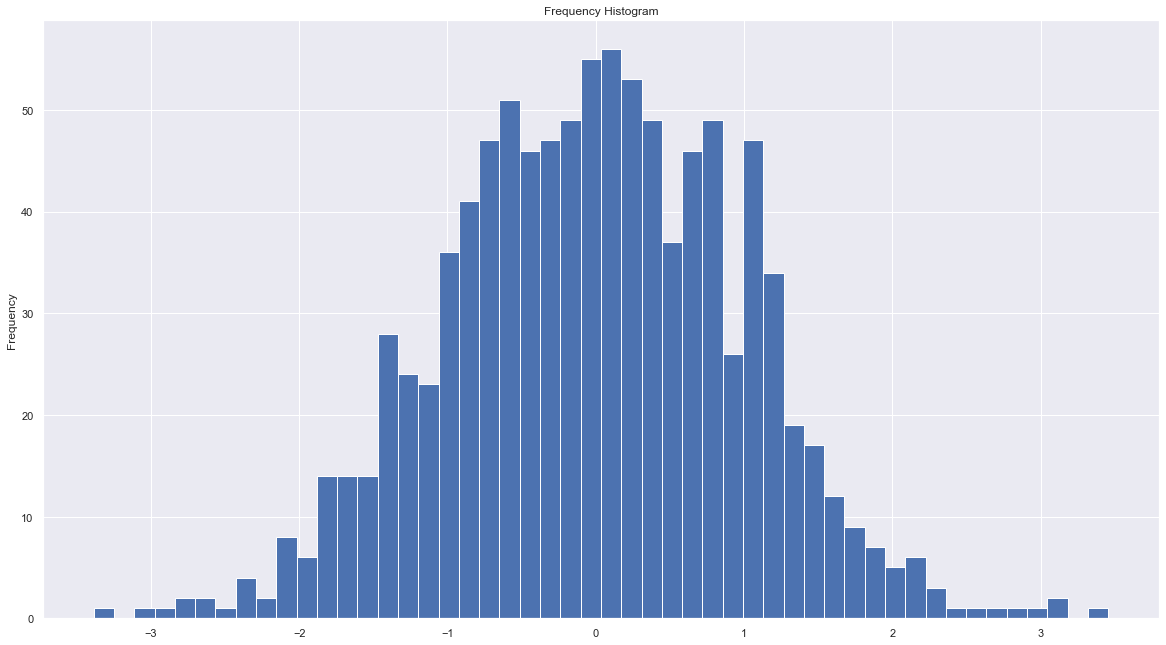

In [10]:
# have a look at feature distributions
# Plot Histogram on x
df_hist = np.random.normal(size = 1000)
plt.hist(df, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In this stage of our predict, we are going to take action on those observation we had on our dataset earlier on. They include;
- Replacing the missing values with `mean()`
- Convert the features with **object** datatype to **numeric** datatype
- Breaking down the `time` feature in to different features such as `Year`, `Month`, `Day` etc
- Removing unneccessary column(s)
- Removing correlated column(s)
- Removing outliers for some features(Scaling)

While we do all these, we will create a function that with automatically help us clean our test data `df_test` which we have note yet loaded on this note. it will save us the stress of engineering the data all over again.

In [10]:
# Convert 'Valencia_wind_deg' and 'Seville_pressure' columns from object datatype to numeric datatype
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('float')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('float')

In [11]:
# remove missing values/ features
# this is to fill those null values in Valencia_pressure column will its average(mean)
df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace=True)

# Now let us check to see if those null values are gone
df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

### Removing features
Before we drop columns, let us check our correlation heatmap again. Remember we added new columns.


In [12]:
corr = df.corr()
corr

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.100737,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Valencia_wind_deg,-0.100737,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,...,-0.341696,-0.260622,-0.265992,-0.283031,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674
Bilbao_rain_1h,-0.249633,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.075864,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.085519,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804


<AxesSubplot:>

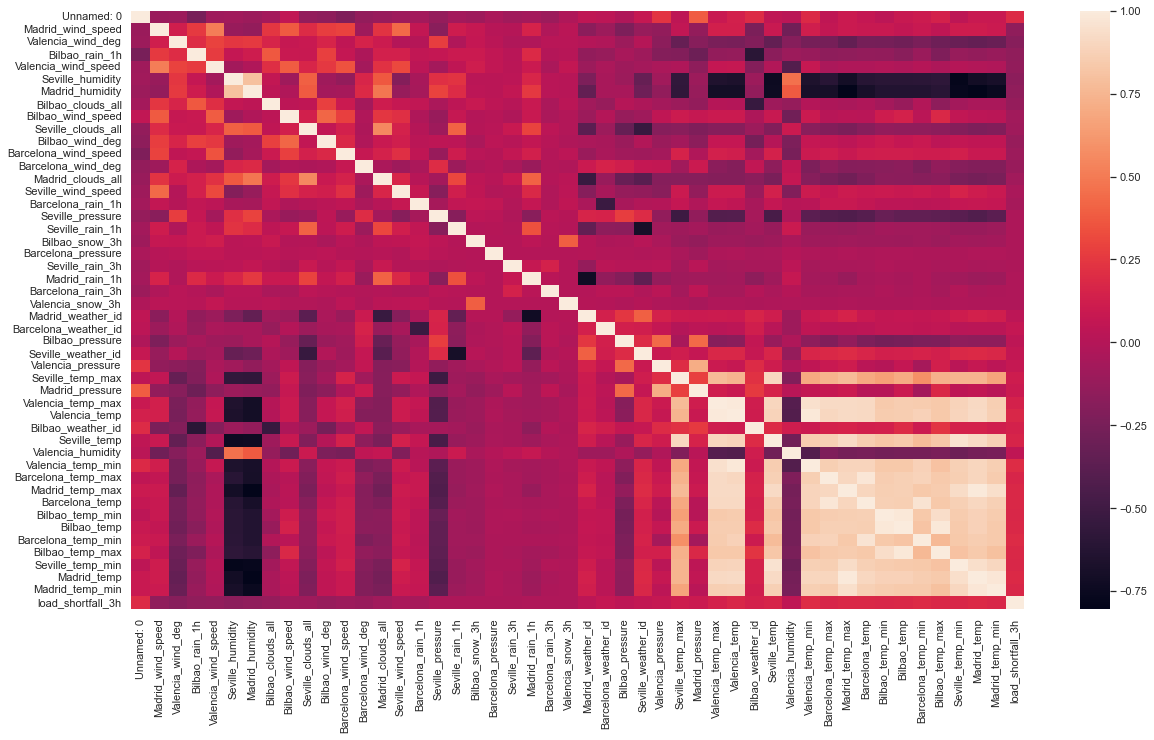

In [13]:
sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)

Judging from our new Heatmap, some of the new features are correlated as well. We will not include these features to our Independent variables for modeling.

Now we will remove the following features and check our Heatmap once again.
`Unnamed` `time` `Madrid_pressure` `Valencia_temp_max` `Valencia_temp` `Seville_temp` `Valencia_temp_min` `Barcelona_temp_max` `Madrid_temp_max` `Barcelona_temp` `Bilbao_temp_min` `Bilbao_temp` `Barcelona_temp_min` `Bilbao_temp_max`       
`Seville_temp_min` `Madrid_temp` `Madrid_temp_min` `Week_of_year` `Day_of_year` `Hour_of_week`         


In [14]:
# engineer existing features
df.drop(columns=['Unnamed: 0', 'time', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp', 
                 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 
                 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 
                 'Madrid_temp_min', 'Seville_humidity'], inplace=True)

df.shape

(8763, 31)

Let us check our heatmap for multicollinearity.


<AxesSubplot:>

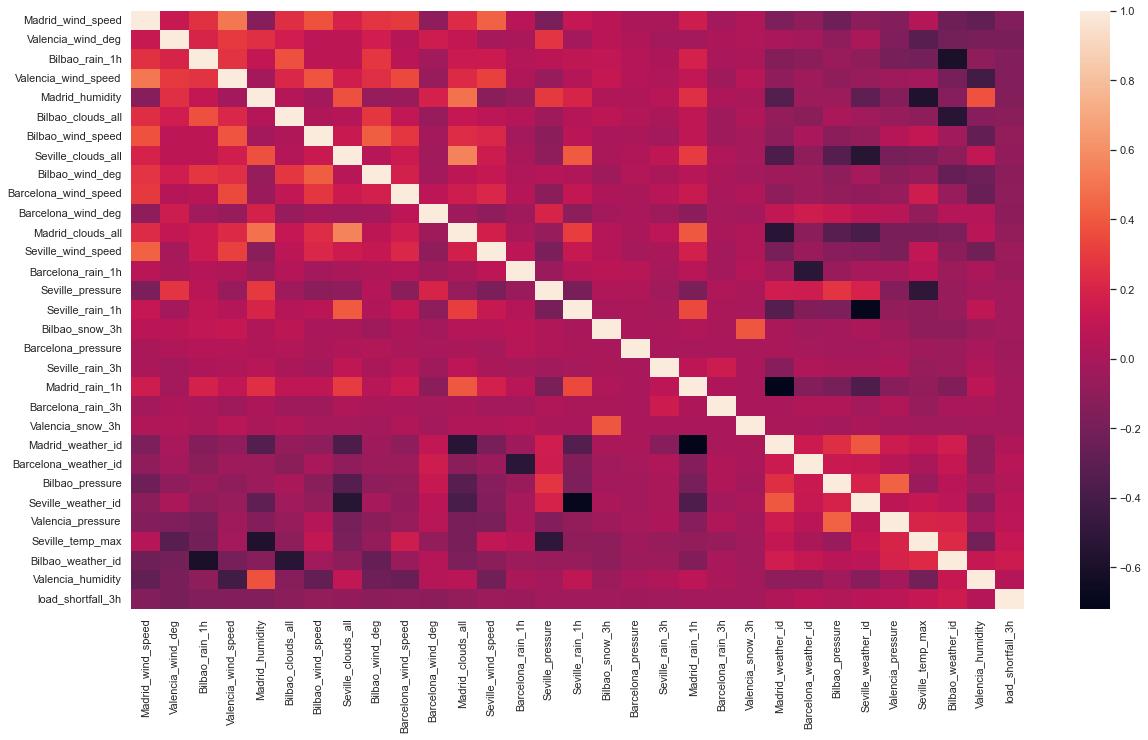

In [15]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)

Its looking good. Finally let us perform feature standard scaling. Feature scaling is the process of normalising the range of features in a dataset. Datasets often contain features with numerous outliers. Therefore, in order for machine learning models to work with these features perfectly, we need to perform feature scaling. We will use the StandarScaler from sklearn.

In [16]:

features = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Madrid_humidity', 
            'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 
            'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 
            'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 
            'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 
            'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 'Valencia_humidity', 
            ]
X = df[features]
X

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,0.666667,5.0,0.0,0.666667,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,...,0.0,0.0,800.000000,800.0,1035.000000,800.000000,1002.666667,274.254667,800.000000,75.666667
1,0.333333,10.0,0.0,1.666667,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,...,0.0,0.0,800.000000,800.0,1035.666667,800.000000,1004.333333,274.945000,800.000000,71.000000
2,1.000000,9.0,0.0,1.000000,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,...,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1005.333333,278.792000,800.000000,65.666667
3,1.000000,8.0,0.0,1.000000,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,...,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1009.000000,285.394000,800.000000,54.000000
4,1.000000,7.0,0.0,1.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,...,0.0,0.0,800.000000,800.0,1035.333333,800.000000,1012.051407,285.513719,800.000000,58.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6.0,0.0,2.666667,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,...,0.0,0.0,727.666667,801.0,1017.666667,769.333333,1012.051407,285.483333,802.333333,71.333333
8759,5.000000,6.0,0.0,2.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,...,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,801.333333,40.333333
8760,6.333333,9.0,0.4,7.333333,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,...,0.0,0.0,702.333333,801.0,1017.333333,801.666667,1009.666667,291.483333,601.000000,44.666667
8761,7.333333,8.0,0.2,7.333333,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,...,0.0,0.0,500.000000,800.0,1020.333333,802.333333,1020.000000,291.483333,634.166667,45.000000


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Let us create a base model first

Our target variable(y) is the `load_shortfall_3h` column. Remember that the `load_shortfall_3h` will be modeled as a function for the rest features.

In [17]:
# split data
X_train = X
X_train

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,0.666667,5.0,0.0,0.666667,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,...,0.0,0.0,800.000000,800.0,1035.000000,800.000000,1002.666667,274.254667,800.000000,75.666667
1,0.333333,10.0,0.0,1.666667,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,...,0.0,0.0,800.000000,800.0,1035.666667,800.000000,1004.333333,274.945000,800.000000,71.000000
2,1.000000,9.0,0.0,1.000000,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,...,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1005.333333,278.792000,800.000000,65.666667
3,1.000000,8.0,0.0,1.000000,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,...,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1009.000000,285.394000,800.000000,54.000000
4,1.000000,7.0,0.0,1.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,...,0.0,0.0,800.000000,800.0,1035.333333,800.000000,1012.051407,285.513719,800.000000,58.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6.0,0.0,2.666667,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,...,0.0,0.0,727.666667,801.0,1017.666667,769.333333,1012.051407,285.483333,802.333333,71.333333
8759,5.000000,6.0,0.0,2.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,...,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,801.333333,40.333333
8760,6.333333,9.0,0.4,7.333333,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,...,0.0,0.0,702.333333,801.0,1017.333333,801.666667,1009.666667,291.483333,601.000000,44.666667
8761,7.333333,8.0,0.2,7.333333,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,...,0.0,0.0,500.000000,800.0,1020.333333,802.333333,1020.000000,291.483333,634.166667,45.000000


In [18]:
# create targets and features dataset
target = "load_shortfall_3h"
y_train = df[target]
y_train

0       6715.666667
1       4171.666667
2       4274.666667
3       5075.666667
4       6620.666667
           ...     
8758     -28.333333
8759    2266.666667
8760     822.000000
8761    -760.000000
8762    2780.666667
Name: load_shortfall_3h, Length: 8763, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [49]:
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

#Predicting for X_train
train_predict = lasso_reg.predict(X_train)
#Predicting for X_test
test_predict = lasso_reg.predict(X_test)


In [50]:
#Comparing the True value and the Predicted Value of our models
linear = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict})
linear

,Actual,Predicted
5495,17856.333333,10781.909357
4824,14750.333333,12314.228991
8422,11475.333333,11314.298997
1310,7308.333333,9029.565624
5769,17822.000000,11947.736138
...,...,...
6638,16891.666667,10846.693748
4238,8718.333333,11682.394804
1035,7757.666667,10264.661800
3783,6622.333333,11921.281905


In [51]:
math.sqrt(metrics.mean_squared_error(y_test,test_predict))

4887.622409556809

In [52]:
# Loading the test data
test_df = pd.read_csv("df_test.csv")
time = test_df['time']

In [53]:
# create a function to use in cleaning the test data

def engineer_data(filepath):
    # Read csv file into dataframe 
    df = pd.read_csv(filepath)
    
    #Filling missing values
    df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)
    
    # Remove unwanted columns
    df.drop(columns=['Unnamed: 0', 'time', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp', 
                 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 
                 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Seville_humidity', 'Madrid_temp', 
                 'Madrid_temp_min'], inplace=True)

     #converting Valencia_wind_deg and Seville_pressure from object to numeric
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('float')
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('float')
    
    return df

In [56]:
df_test = engineer_data("df_test.csv")

In [57]:
# evaluate one or more ML models
df_test['load_shortfall_3h'] = lasso_reg.predict(df_test)

In [59]:
df_test['time'] = time
load = df_test[['time','load_shortfall_3h']]
load.to_csv('predicted_load_shortfall4.csv', index = False)
load

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9435.108269
1,2018-01-01 03:00:00,8868.870095
2,2018-01-01 06:00:00,9579.282237
3,2018-01-01 09:00:00,10472.090195
4,2018-01-01 12:00:00,9066.110085
...,...,...
2915,2018-12-31 09:00:00,10080.371412
2916,2018-12-31 12:00:00,11369.194724
2917,2018-12-31 15:00:00,12307.482601
2918,2018-12-31 18:00:00,11512.837823


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic